# 如何快速在一张二值化了的图片检测那些像素是属于一个物体块？
注意快速连通物体检测算法只能识别二值化了的图片中哪些像素是相互连接的一个整体。换句话说就是这个算法可以检测到哪些像素是相互连通的。它其实就是可以看作是计算机算法中的连通子图问题。
连通物体检测算法有哪些用？1. OCR文字识别中可以用连通物体检测算法识别哪些像素是属于一个汉字。然后对这个汉字识别 2. 物体检测。
直接看下图就懂了
![](./fast_label_algorithm_example.gif)

我对上面这幅图来描述一下增强你对它的理解。连通域快速标记算法一共需要遍历两遍。

**第1遍**：前面提到了连通域标记算法处理的是 [二值化](./Otsu's_Method_algorithm/)了的图，这意味着这些像素非0即1,而且物体的像素值是1. 如果你还不懂二值化可以参考本项目中的这篇教程[Otsu二值化图像算法](./Otsu's_Method_algorithm/).现在从上到下从左到右遍历所有像素点，只要遇到像素值是1，则判断它周围是否有像素被标记了。如果周围没有像素被标记那就标签值+1（假设目前最大标签值是2，现在当前像素点周围没有被标记过的像素，那当前像素点就被标记为3）。
现在问题来了什么叫做某个像素点“周围”？请看下面这张图。右两种规则找周围像素点，分别是4邻接和8邻接。标红的圆圈○就是中心像素点的“周围”。4邻接和8邻接就是两种不同的判断“周围”像素的规则。
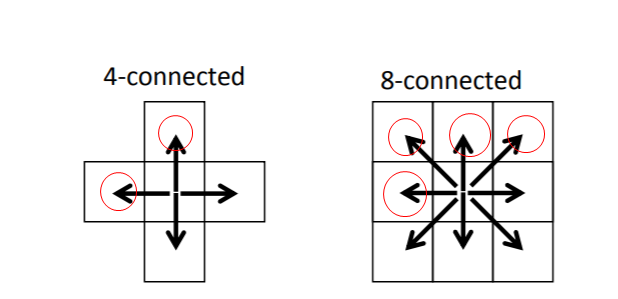

如果遇到周围有多个像素点被标记那就讲最小的那个标签值赋值给当前像素点。并且创建一个树将较大的那些像素点的标签值加入到最小的那个像素值的子节点。存储树的结构是用一个数组来存储。数组的值是父节点的下标。比如{2,0,4...}表示序号是0那个元素的父节点序号是2，序号是1那个元素的父节点序号是0，序号是2那个元素的父节点序号是4.

**第2遍**：使用并查集算法将同一颗树下的所有元素都标记为根节点那个标签值。并查集算法有什么用？答：根据第1遍所创建的那个数组来找树的根节点。

参考文献：
https://blog.csdn.net/hemeinvyiqiluoben/article/details/39854315
# Python编程实践二值图连通域快速标记算法fast labeling algorithm

[[0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 1 0 0]
 [0 1 1 1 0 1 1 1 0]
 [0 0 0 1 0 0 1 0 0]
 [0 0 0 0 0 1 1 0 0]
 [0 0 0 0 0 0 0 0 0]]


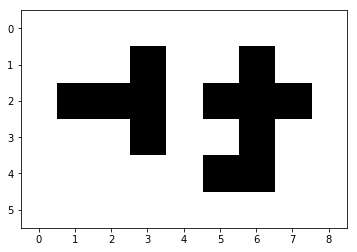

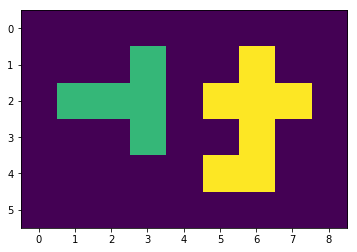

In [20]:
import numpy as np
img_mat = np.array([[0, 0, 1, 0, 0, 1, 0],
                    [1, 1, 1, 0, 1, 1, 1],
                    [0, 0, 1, 0, 0, 1, 0],
                    [0, 0, 0, 0, 1, 1, 0]], dtype=np.int8)
img_mat = np.pad(img_mat,(1,1),mode= 'constant',constant_values = 0)
import matplotlib.pyplot as plt
plt.imshow(img_mat,cmap='gray_r')
plt.show()

label = 2
# 用于获取周围元素的掩码
surround_mask = np.array([[0,1,0],
                          [1,0,0],
                          [0,0,0]],np.int8)
tree_arr = np.zeros(img_mat.shape[0]*img_mat.shape[1],dtype=np.int8)
for row in range(1,img_mat.shape[0]-1):
    for col in range(1,img_mat.shape[1]-1):
        if img_mat[row,col]==0:
            continue
            
        surround_elem = surround_mask*img_mat[row-1:row+2,col-1:col+2]
        surround_labels = surround_elem[surround_elem!=0]
        
        if surround_labels.shape[0]!=0:
            min_surround_label = surround_labels.min()
            if min_surround_label!=0 and min_surround_label!=1:# 周围存在被标记过的数据
                img_mat[row,col] = min_surround_label
                tree_arr[surround_labels[surround_labels!=min_surround_label]] = min_surround_label
                continue
        
        img_mat[row,col] = label
        tree_arr[label] = label
        label += 1

for i in range(2,label):
    k = i
    while k!=tree_arr[k]:
        k = tree_arr[k]    
    tree_arr[i] = k

for row in range(img_mat.shape[0]):
    for col in range(img_mat.shape[1]):
        img_mat[row,col] = tree_arr[img_mat[row,col]]

plt.imshow(img_mat)
